In [55]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
df=pd.read_csv('/content/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [45]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [39]:
df['MINIMUM_PAYMENTS'] = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean())
df['CREDIT_LIMIT'] = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean())

In [33]:
new_df = pd.DataFrame()
new_df['CREDIT_LIMIT'] = df.CREDIT_LIMIT
new_df['PURCHASES_TRX'] = df.PURCHASES_TRX

In [28]:
new_df.head()

,CREDIT_LIMIT,PURCHASES_TRX
0,1000.0,2
1,7000.0,0
2,7500.0,12
3,7500.0,1
4,1200.0,1


In [57]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='complete')
clust_labels = model.fit_predict(new_df)
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,4
2,4
3,4
4,2
...,...
8945,2
8946,2
8947,2
8948,2


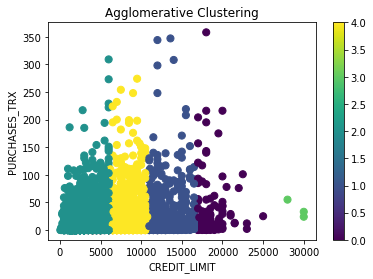

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_df['CREDIT_LIMIT'],new_df['PURCHASES_TRX'],
                    c=agglomerative[0],s=50)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('CREDIT_LIMIT')
ax.set_ylabel('PURCHASES_TRX')
plt.colorbar(scatter)

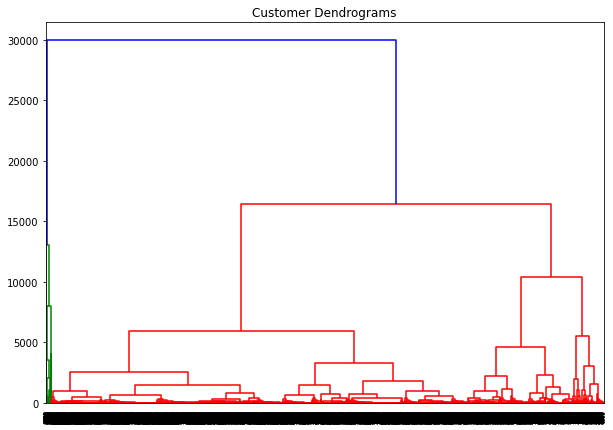

In [63]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(new_df,method="complete"))

In [67]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(new_df)

KMeans(n_clusters=5, random_state=0)

In [68]:
labels = pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [82]:
kmeans.predict(new_df)
print(kmeans.cluster_centers_)

[[1.58701082e+03 9.04284194e+00]
 [6.85212173e+03 1.99026346e+01]
 [1.62516304e+04 3.79746377e+01]
 [1.04815474e+04 2.42067757e+01]
 [3.82017149e+03 1.37070009e+01]]


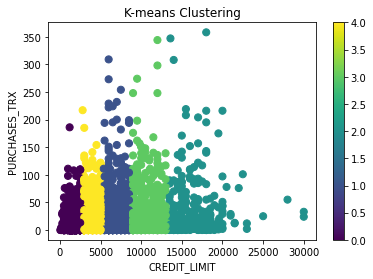

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(new_df['CREDIT_LIMIT'],new_df['PURCHASES_TRX'], c=kmeans.predict(new_df),s=50)
ax.set_title('K-means Clustering')
ax.set_xlabel('CREDIT_LIMIT')
ax.set_ylabel('PURCHASES_TRX')
plt.colorbar(scatter)

In [87]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(new_df)
    Sum_of_squared_distances.append(km.inertia_)

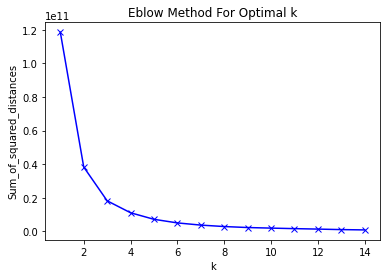

In [88]:
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Eblow Method For Optimal k')
plt.show()